In [ ]:
# 나눔 글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,996 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and dire

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

import os
import sys
from sqlalchemy import Column, ForeignKey, Integer, CHAR, Date, String, Time, Index, DateTime, TIMESTAMP, func, or_
from sqlalchemy.dialects.mysql import INTEGER, BIT, TINYINT, TIME, DOUBLE, TEXT,TIMESTAMP
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import relationship
from sqlalchemy import create_engine
from sqlalchemy import PrimaryKeyConstraint
from sqlalchemy.orm import sessionmaker
# server = 'YOUR AWS address'
# connection_string = 'mysql+mysqldb://root:MYSQLPassword@{}:3306/findas'.format(server)
# engine = create_engine(connection_string, pool_recycle = 3600, encoding='utf-8')

Base = declarative_base()

class deposit_periodic(Base):
    __tablename__ = 'deposit_periodic'
    idandtype = Column(String(15), primary_key = True, nullable = False, autoincrement = False)
    productname = Column(String(50), nullable = False, default = None)
    company = Column(String(50), nullable= False, default = None)
    interest_type = Column(String(15),nullable = False, default = 'simple')
    deposit_type = Column(String(15),nullable = False, default = None)
    highest_rate = Column(DOUBLE,nullable = False, default = None)
    deposit_limit = Column(String(15), nullable = True, default = None)
    period = Column(String(20), nullable = True, default = None)
    monthly_interest = Column(TEXT,nullable = True, default = None)
    preference = Column(TEXT,nullable = True, default = None)
    review_counts = Column(INTEGER, nullable = True, default = 0)
    average_rate = Column(DOUBLE, nullable = True, default = None)

class deposit_fixed(Base):
    __tablename__ = 'deposit_fixed'
    idandtype = Column(String(15), primary_key = True, nullable = False, autoincrement = False)
    productname = Column(String(50), nullable = False, default = None)
    company = Column(String(50), nullable= False, default = None)
    interest_type = Column(String(15),nullable = False, default = 'simple')
    highest_rate = Column(DOUBLE,nullable = False, default = None)
    deposit_limit = Column(String(15), nullable = True, default = None)
    period = Column(String(20), nullable = True, default = None)
    redemption_interest = Column(TEXT, nullable = True, default = None)
    monthly_interest = Column(TEXT,nullable = True, default = None)
    review_counts = Column(INTEGER, nullable = True, default = 0)
    average_rate = Column(DOUBLE, nullable = True, default = None)


class reviews(Base):
    __tablename__ = 'reviews'
    reviewid = Column(INTEGER, nullable = False, autoincrement = True, primary_key = True)
    date = Column(String(15), nullable = False, autoincrement = False, primary_key = False)
    idandtype = Column(String(15), nullable = False, autoincrement = False)
    total_rating = Column(DOUBLE,nullable = False, default = None)
    interest_sat = Column(INTEGER,nullable = False, default = None)
    online_sat = Column(INTEGER, nullable = False, default = None)
    prof_sat = Column(INTEGER, nullable = False, default = None)
    service_sat = Column(INTEGER, nullable = False, default = None)
    review = Column(TEXT,nullable = True, default = None)


<ipython-input-1-ec38522ef267>:18: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns
import re

%matplotlib inline

# 정기적금 상품 분석
* 정기 적금 상품의 경우 productid가 다르면 상품역시 다르게 나타남


In [ ]:
#dp_df = pd.read_sql('select * from deposit_periodic',engine)
dp_df = pd.read_csv('/content/drive/MyDrive/ASAC_최종프로젝트/data/dp/dp_df.csv',encoding = 'utf-8')
dp_df.head()

,Unnamed: 0,idandtype,productname,company,interest_type,deposit_type,highest_rate,deposit_limit,period,monthly_interest,preference,review_counts,average_rate
0,0,100DEPOSIT,"고단위 플러스(금리확정형, 만기일시지급식, 법인)",kebhana,단리,자유적립,1.3,제한없음 ~ 제한없음,6개월 ~ 60개월,\r\n개월별 기본금리\r\n6개월기본 1.3%우대 시 1.3%12개월기본 1.4%...,NaN,0,NaN
1,1,101DEPOSIT,"고단위 플러스(금리연동형, 월이자지급식, 개인)",kebhana,단리,자유적립,1.2,제한없음 ~ 제한없음,6개월 ~ 12개월,\r\n개월별 기본금리\r\n6개월기본 1.2%우대 시 1.2%12개월기본 1.3%...,NaN,0,NaN
2,2,102DEPOSIT,"고단위 플러스(금리연동형, 월이자지급식, 법인)",kebhana,단리,자유적립,1.2,제한없음 ~ 제한없음,6개월 ~ 12개월,\r\n개월별 기본금리\r\n6개월기본 1.2%우대 시 1.2%12개월기본 1.3%...,NaN,0,NaN
3,3,103DEPOSIT,"고단위 플러스(금리연동형, 만기일시지급식, 개인)",kebhana,단리,자유적립,1.3,제한없음 ~ 제한없음,6개월 ~ 12개월,\r\n개월별 기본금리\r\n6개월기본 1.3%우대 시 1.3%12개월기본 1.4%...,NaN,0,NaN
4,4,104DEPOSIT,"고단위 플러스(금리연동형, 만기일시지급식, 법인)",kebhana,단리,자유적립,1.3,제한없음 ~ 제한없음,6개월 ~ 12개월,\r\n개월별 기본금리\r\n6개월기본 1.3%우대 시 1.3%12개월기본 1.4%...,NaN,0,NaN


* 정기적금 상품간 비교를 위해 만기 6개월 상품, 12개월상품, 24개월,36개월 기본금리를 새로운 열로 추가한다.

In [ ]:
def find_6(strs):
    x = re.search('\s6개월기본(.+?%)',strs)
    try:
        return float(x.group(1).replace('%',''))
    except:
        return np.nan
def find_12(strs):
    x = re.search('12개월기본(.+?%)',strs)
    try:
        return float(x.group(1).replace('%',''))
    except:
        return np.nan

def find_24(strs):
    x = re.search('24개월기본(.+?%)',strs)
    try:
        return float(x.group(1).replace('%',''))
    except:
        return np.nan
def find_36(strs):
    x = re.search('36개월기본(.+?%)',strs)
    try:
        return float(x.group(1).replace('%',''))
    except:
        return np.nan
dp_df['month_6'] = dp_df.monthly_interest.apply(find_6)#monthly_interest(개월별 금리) 부분에서 6개월 금리만 따로 때어냄
dp_df['month_12'] = dp_df.monthly_interest.apply(find_12)
dp_df['month_24'] = dp_df.monthly_interest.apply(find_24)
dp_df['month_36'] = dp_df.monthly_interest.apply(find_36)

* 정기적금 상품의 기술통계를 나타낸표
    * 적금 상품의 최고 금리를 100%라고 표시하는등 상품에 대한 정보가 잘 못 표기된 상품이 존재
    * 75%가 넘는 상품의 리뷰수 가 0 이라는 점을 보아 상품에 대한 평가가 활발하게 이루어지는 것을 확인 가능  
    * 적금 상품들의 평균 금리가 12개월 만기 기준 2.03%에서 형성되어 있고 50%가 넘는 상품들이 2%의 금리를 넘지 않는 상품이란것을 확인가능 하다.

In [ ]:
from tabulate import tabulate


def decode_txt(strs):
    try:
        return strs.decode('utf-8')
    except:
        return strs

print(dp_df.describe())
print(tabulate(dp_df[dp_df.highest_rate == 100].applymap(decode_txt)[['productname','company','interest_type','highest_rate']],
               headers= 'keys', tablefmt='psql'))


       Unnamed: 0  highest_rate  review_counts  average_rate     month_6  \
count  589.000000    589.000000     589.000000     95.000000  318.000000   
mean   294.000000      3.087182       0.511036      3.854737    1.733711   
std    170.173931      9.892193       2.921064      0.670149    0.555475   
min      0.000000      0.000000       0.000000      2.000000    0.850000   
25%    147.000000      1.500000       0.000000      3.500000    1.300000   
50%    294.000000      1.900000       0.000000      4.000000    1.600000   
75%    441.000000      2.400000       0.000000      4.000000    2.100000   
max    588.000000    100.000000      62.000000      5.000000    4.400000   

         month_12    month_24    month_36  
count  558.000000  455.000000  428.000000  
mean     2.031846    2.108725    2.147617  
std      0.871473    0.740458    0.658103  
min      0.800000    1.000000    1.100000  
25%      1.400000    1.500000    1.600000  
50%      1.800000    2.000000    2.000000  
75%    

* 상품에 대한 리뷰수가 5개이상인 상품을 보면 모두 제1금융권 은행의 상품이면서 적금 가입 제한조건이 없거나 약한 상품들이라는 것을 확인 가능하다.

In [ ]:
dp_df[dp_df['review_counts'] > 5][['productname','company','interest_type','highest_rate','period',
                                   'deposit_limit','review_counts','month_6','month_12','month_24','month_36']].sort_values('review_counts',ascending = False)

,productname,company,interest_type,highest_rate,period,deposit_limit,review_counts,month_6,month_12,month_24,month_36
372,KB Smart 폰 적금,kb,단리,2.20,6개월 ~ 36개월,제한없음 ~ 100만원,62,0.9,1.30,1.40,1.60
361,직장인우대적금,kb,단리,2.10,12개월 ~ 36개월,1만원 ~ 300만원,13,NaN,1.30,1.50,1.80
567,난할수있어 적금2,kebhana,단리,4.30,6개월 고정,제한없음 ~ 30만원,12,1.8,NaN,NaN,NaN
112,신한 월복리 적금(자유적립식),shinhan,복리,2.10,36개월 고정,제한없음 ~ 100만원,11,NaN,NaN,NaN,1.55
75,IBK흔들어적금,ibk,단리,1.90,6개월 ~ 24개월,제한없음 ~ 300만원,10,1.1,1.35,1.45,NaN
350,주택청약종합저축,kb,단리,1.00,6개월 ~ 60개월,2만원 ~ 50만원,10,1.0,1.50,2.00,2.00
568,우리 스마트폰 적금,woori,단리,2.40,12개월 고정,제한없음 ~ 50만원,10,NaN,1.50,NaN,NaN
89,신한 주거래 우대적금(자유적립식),shinhan,단리,2.65,12개월 ~ 36개월,제한없음 ~ 50만원,9,NaN,1.05,1.10,1.25
92,신한 저축습관만들기 적금 (자유적립식),shinhan,단리,1.85,6개월 ~ 36개월,제한없음 ~ 100만원,7,1.2,1.55,1.55,1.60
209,신한 스마트 적금,shinhan,단리,1.80,12개월 고정,제한없음 ~ 100만원,7,NaN,1.80,NaN,NaN


* 현재가치를 고려한 실질 이자율 계산
    * 적금으로 인해 매달 지급하는 금액과 만기시 얻는 총 수익을 고정이자율로 할인하여(기준금리) 적금으로 부터 얻을 수 있는 실질 이자율을 구해본다.
    * 실질 이자율을 바탕으로 실질 이자율을 가장 높게 만드는 적금 기간도 구해본다.

In [ ]:
# 적금
def month_real(interest,month):
    if not np.isnan(interest):
        a =  - sum([ -100 / (1.0125) ** (i/12.0)   for i in xrange(0,month)]) #만기시까지 지급한 금액의 현재가치
        b = 100.0 * month + np.sum([ 100 * (interest * 0.01) * i / 12.0   for i in xrange(1,month + 1)]) #만기후 수령액의 미래가치
        b = b / (1.0125)**(month/12.0) # 만기후 수령액의 현재가치

        return ((b/a)**(12.0/month) - 1) * 100
    else:
        return 0

def month_complex_real(interest,month):
    if interest != np.nan:
        a =  - sum([ -100 / (1.0125) ** (i/12.0)   for i in xrange(0,month)])
        b = np.sum([ 100 *   (1+ ((interest * 0.01) / 12.0)) ** (i)  for i in xrange(1,month + 1)])
        b = b / (1.0125)**(month/12.0)
        return ((b/a)**(12.0/month) - 1) * 100

    else:
        return 0

real_interest = []
interest_period = []
try:
    # Python 2
    xrange
except NameError:
    # Python 3, xrange is now named range
    xrange = range

for i in xrange(0,len(dp_df)):
    if dp_df.loc[i, 'interest_type'] == '단리':  # 상품의 금리방식이 단리인 경우
        real_interest.append(max(month_real(dp_df.loc[i, 'month_6'], 6), month_real(dp_df.loc[i, 'month_12'], 12),
                                 month_real(dp_df.loc[i, 'month_24'], 24), month_real(dp_df.loc[i, 'month_36'], 36)))
        interest_period.append(np.argmax([month_real(dp_df.loc[i, 'month_6'], 6), month_real(dp_df.loc[i, 'month_12'], 12), 0,
                                          month_real(dp_df.loc[i, 'month_24'], 24), 0, month_real(dp_df.loc[i, 'month_36'], 36)]))
    elif dp_df.loc[i, 'interest_type'] == '복리':  # 상품의 금리방식이 복리인 경우
        real_interest.append(max(month_complex_real(dp_df.loc[i, 'month_6'], 6), month_complex_real(dp_df.loc[i, 'month_12'], 12),
                                 month_complex_real(dp_df.loc[i, 'month_24'], 24), month_complex_real(dp_df.loc[i, 'month_36'], 36)))
        interest_period.append(np.argmax([month_complex_real(dp_df.loc[i, 'month_6'], 6), month_complex_real(dp_df.loc[i, 'month_12'], 12), 0,
                                          month_complex_real(dp_df.loc[i, 'month_24'], 24), 0, month_complex_real(dp_df.loc[i, 'month_36'], 36)]))

dp_df['real_interest'] = np.asarray(real_interest)
dp_df['maximum_period'] = (np.asarray(interest_period) + 1) * 6

* ibk은행의 참 좋은 캐시백적금이 연 평균 4.97%로 가장 높은 실질 금리를 제공하는 것으로 나타났다.(명목금리 10%) 그러나 특정 카드 사용 후 카드에 대한 적립금만 적립할 수 있는 특정한 상품이라는 것을 고려해보았을 때 WELCOME 저축은행의 WELCOME 디딤돌 적금이 가장 높은 실질 금리를 나타낸다.


In [ ]:
dp_df.sort_values('real_interest',ascending = False)[:10][['productname', 'company','interest_type','month_12','real_interest','maximum_period']]

,productname,company,interest_type,month_12,real_interest,maximum_period
199,참!좋은 캐시백적금,ibk,단리,10.00,4.709045,12
130,WELCOME 디딤돌적금,welcome_sb,단리,6.80,2.987347,12
540,Welcome 디딤돌적금,welcome_sb,단리,6.60,2.879740,12
535,KB국군희망준비적금,kb,단리,5.40,2.234104,12
492,KB국군희망준비적금,kb,단리,5.40,2.234104,12
513,IBK국군희망준비적금,ibk,단리,5.25,2.153399,12
70,IBK국군희망준비적금,ibk,단리,5.25,2.153399,12
541,Welcome 드림 정기적금,welcome_sb,단리,5.00,2.018891,12
233,우리국군사랑적금,woori,단리,4.70,1.857482,12
525,KB국군장병우대적금(간부용),kb,단리,4.70,1.857482,12


* 제 1금융권의 적금 상품만을 기준으로 실질 금리가 높은 상품을 찾아본 결과 일정 카드포인트 만으로 사용할 수 있는 ibk은행의 캐시백 적금, 군인만이 가입할 수 있는 국군희망준비적금 등의 금리가 가장 높게 나타났다.

In [ ]:
#제 1금융권 은행
banking_sectors = ['bnkgn','citi','dgb','gwangju','ibk','jbb','jeju', 'kb', 'kdb', 'kebhana', 'nh', 'sc', 'shinhan', 'suhyup','woori']
dp_df[[company in banking_sectors for company in dp_df['company']]].sort_values('real_interest',ascending = False)[:10][['productname', 'company','interest_type','month_12','real_interest','maximum_period']]

,productname,company,interest_type,month_12,real_interest,maximum_period
199,참!좋은 캐시백적금,ibk,단리,10.00,4.709045,12
492,KB국군희망준비적금,kb,단리,5.40,2.234104,12
535,KB국군희망준비적금,kb,단리,5.40,2.234104,12
513,IBK국군희망준비적금,ibk,단리,5.25,2.153399,12
70,IBK국군희망준비적금,ibk,단리,5.25,2.153399,12
233,우리국군사랑적금,woori,단리,4.70,1.857482,12
525,KB국군장병우대적금(간부용),kb,단리,4.70,1.857482,12
534,KB국군장병우대적금(간부용),kb,단리,4.70,1.857482,12
554,KB국민행복적금 (정액적립식),kb,단리,4.50,1.749876,12
555,KB국민행복적금 (자유적립식),kb,단리,4.50,1.749876,12


In [ ]:
!pip install konlpy

* 우대사항 텍스트 분석을 통한 적금 상품 클러스터링
* 비슷한 우대사항 항목을 보유한 제품끼리 클러스터링 하여 상품별 분류를 원활하게 한다.
    * 우대사항에 적힌 내용을 Konlpy의 Kkma클래스를 이용해서 사용된 명사별로 구분하고
    * 구분된 명사를 바탕으로 각각의 우대사항의 Tf-Idf 스코어 산출
    * Tf-Idf 스코어를 K-means알고리즘을 활용하여 클러스터링 분류

In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Kkma,Twitter

def none_str(strs):
    if isinstance(strs, str) and len(strs) < 15:
        return '우대사항 무'
    elif isinstance(strs, float) and pd.isna(strs):
        return '우대사항 무'
    else:
        return strs

morphs = dp_df['preference'].apply(none_str).apply(decode_txt).apply(Kkma().morphs)
tfidf = TfidfVectorizer(max_features = 500,stop_words = [u'최고',u'우대',u'금리',u'투자증권',u'신한은행',u'우리은행',u'신한',u'하나은행'])
text_features = tfidf.fit_transform(morphs.apply(lambda x : ' '.join(x)))
model = KMeans(init="k-means++", n_clusters=10, random_state=42, max_iter=600).fit(text_features.toarray())
dp_df['cluster'] = model.predict(text_features.toarray())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* 첫 번째 클러스터에는 인터넷 뱅킹 및 스마트폰 뱅킹에 대한 우대금리를 부여하는 상품들로 묶여있고 두번째클러스터에는 우대사항이 없거나 기제되지 않는 상품들로 이루어져있다.
* 이와 같은 방식으로 각각의 클러스터에는 다음과 같은 특징이 나타난다.
    * cluster 0 : 인터넷뱅킹,스마트폰뱅킹 우대 상품
    * cluster 1 : 우대조건이 없는경우
    * cluster 2 : 체크카드 사용 우대
    * cluster 3 : 상품구분 모호
    * cluster 4 : 상품구분 모호
    * cluser  5 :  만기 해지 시 우대
    * cluster 6 : 인터넷 뱅킹 시 우대
    * cluster 7 : 상품구분 모호
    * cluster 8 :방카 슈랑스 및 체크카드 우대
    * cluster 9 : 상품구분 모호

In [ ]:
from tabulate import tabulate

def cutthe_text(strs):
    if isinstance(strs, str) and len(strs) > 30:
        return strs[:10]
    elif pd.isna(strs):
        return 'NaN'
    else:
        return strs

for i in range(10):
    print("cluster {}".format(i), '\n', tabulate(dp_df[dp_df.cluster == i].applymap(decode_txt)[['productname', 'company', 'preference']].applymap(cutthe_text).head(20),
                                                  headers='keys', tablefmt='psql'))


cluster 0 
 +-----+-------------------------------------------------+------------+------------------------+
|     | productname                                     | company    | preference             |
|-----+-------------------------------------------------+------------+------------------------|
|   0 | 고단위 플러스(금리확정형, 만기일시지급식, 법인) | kebhana    | NaN                    |
|   1 | 고단위 플러스(금리연동형, 월이자지급식, 개인)   | kebhana    | NaN                    |
|   2 | 고단위 플러스(금리연동형, 월이자지급식, 법인)   | kebhana    | NaN                    |
|   3 | 고단위 플러스(금리연동형, 만기일시지급식, 개인) | kebhana    | NaN                    |
|   4 | 고단위 플러스(금리연동형, 만기일시지급식, 법인) | kebhana    | NaN                    |
|  40 | 희망모아적금(자유적립식)                        | bnkgn      | 만기해지하는 경우      |
|  64 | IBK e-끌림통장(자유적금)                        | ibk        | NaN                    |
|  97 | 펀드가 있는 적금                                | woori      | NaN                    |
| 129 | e-정기적금                                      | welcome_sb

* 클러스터링 과정에서 같은 우대조건을 가지고 있으면서 다른 클러스터로 분리된 상품을 동일한 상품군으로 바꾸어 준다.

In [ ]:
dp_df['cluster'] = [0 if (i ==0 or i==6) else i for i in dp_df['cluster']]

* 기본 금리를 바탕으로 실질 이자율을 계산했을 때와 동일하게 우대 금리를 바탕으로 실질 우대금리를 찾아본다.

In [ ]:
try:
    # Python 2
    xrange
except NameError:
    # Python 3, xrange is now named range
    xrange = range

def pfind_6(strs):
    x = re.search('\s6개월기본 .+?우대 시 (.+?%)',strs)
    try:
        return float(x.group(1).replace('%',''))
    except:
        return np.nan
def pfind_12(strs):
    x = re.search('12개월기본 .+?우대 시 (.+?%)',strs)
    try:
        return float(x.group(1).replace('%',''))
    except:
        return np.nan

def pfind_24(strs):
    x = re.search('24개월기본 .+?우대 시 (.+?%)',strs)
    try:
        return float(x.group(1).replace('%',''))
    except:
        return np.nan
def pfind_36(strs):
    x = re.search('36개월기본 .+?우대 시 (.+?%)',strs)
    try:
        return float(x.group(1).replace('%',''))
    except:
        return np.nan

dp_df['p_month_6'] = dp_df.monthly_interest.apply(pfind_6)# 6개월 우대금리
dp_df['p_month_12'] = dp_df.monthly_interest.apply(pfind_12) # 12개월 우대금리
dp_df['p_month_24'] = dp_df.monthly_interest.apply(pfind_24)
dp_df['p_month_36'] = dp_df.monthly_interest.apply(pfind_36)

real_interest = []
interest_period = []

for i in range(len(dp_df)):
    if dp_df.loc[i, 'interest_type'] == '단리':
        real_interest.append(max(month_real(dp_df.loc[i, 'p_month_6'], 6), month_real(dp_df.loc[i, 'p_month_12'], 12),
                                 month_real(dp_df.loc[i, 'p_month_24'], 24), month_real(dp_df.loc[i, 'p_month_36'], 36)))
        interest_period.append(np.argmax([month_real(dp_df.loc[i, 'p_month_6'], 6), month_real(dp_df.loc[i, 'p_month_12'], 12), 0,
                                          month_real(dp_df.loc[i, 'p_month_24'], 24), 0, month_real(dp_df.loc[i, 'p_month_36'], 36)]))
    elif dp_df.loc[i, 'interest_type'] == '복리':
        real_interest.append(max(month_complex_real(dp_df.loc[i, 'p_month_6'], 6), month_complex_real(dp_df.loc[i, 'p_month_12'], 12),
                                 month_complex_real(dp_df.loc[i, 'p_month_24'], 24), month_complex_real(dp_df.loc[i, 'p_month_36'], 36)))
        interest_period.append(np.argmax([month_complex_real(dp_df.loc[i, 'p_month_6'], 6), month_complex_real(dp_df.loc[i, 'p_month_12'], 12), 0,
                                          month_complex_real(dp_df.loc[i, 'p_month_24'], 24), 0, month_complex_real(dp_df.loc[i, 'p_month_36'], 36)]))

dp_df['real_interest'] = np.asarray(real_interest)
dp_df['maximum_period'] = (np.asarray(interest_period) + 1) * 6

* 인터넷 뱅킹을 통한 적금 가입을 우대조건으로 보유하고 있는 상품의 실질 우대금리 top 5 상품
    * 기존의 핀다 사이트에서 제시하지 못했던 우대금리 상품 분류 및 우대금리 적용 이자율 제시

In [ ]:
dp_df[dp_df['cluster'] == 0].sort_values('real_interest', ascending=False)[:5][['productname', 'company', 'real_interest', 'maximum_period', 'preference']]

,productname,company,real_interest,maximum_period,preference
199,참!좋은 캐시백적금,ibk,4.709045,12,NaN
130,WELCOME 디딤돌적금,welcome_sb,2.987347,12,NaN
40,희망모아적금(자유적립식),bnkgn,2.018891,12,만기해지하는 경우\r\n
251,희망정기적금,sbi_sb,1.427058,12,NaN
537,KB미소드림적금,kb,1.363573,36,우대이율 없음


* 인터넷 뱅킹 우대금리 지원 상품 중 제 1금융권 상품의 실질 우대 이자율 top 5 상품

In [ ]:
banking_sectors = ['bnkgn', 'citi', 'dgb', 'gwangju', 'ibk', 'jbb', 'jeju', 'kb', 'kdb', 'kebhana', 'nh', 'sc', 'shinhan', 'suhyup', 'woori']
dp_df[(dp_df['company'].isin(banking_sectors)) & (dp_df['cluster'] == 0)].sort_values('real_interest', ascending=False)[:5][['productname', 'company', 'real_interest', 'maximum_period', 'preference']]

,productname,company,real_interest,maximum_period,preference
199,참!좋은 캐시백적금,ibk,4.709045,12,NaN
40,희망모아적금(자유적립식),bnkgn,2.018891,12,만기해지하는 경우\r\n
208,신한 미소드림 적금,shinhan,1.363573,36,NaN
202,IBK미소드림적금,ibk,1.363573,36,NaN
563,KB미소드림적금,kb,1.363573,36,NaN


* 정기 적금상품 댓글 분석

In [ ]:
representatives = tuple(set(dp_df['idandtype'])) #정기 적금 상품의 id set
# dp_reviews = pd.read_sql("select * from reviews where idandtype in {} ".format(representatives),engine)
# dp_reviews = pd.merge(dp_df[['productname','company','idandtype','review_counts']],dp_reviews, on = 'idandtype') # dp_df dataframe에서 필요한 상품이름, 회사이름을 가져온다.
# dp_reviews = dp_reviews.drop_duplicates('review') #중복되는 데이터 제거
dp_reviews = pd.read_csv('/content/drive/MyDrive/ASAC_최종프로젝트/data/dp/dp_reviews.csv',encoding = 'utf-8')

* 리뷰를 10개 이상 받은 상품의 평균 만족도 분포
    * 총 7개의 적금 상품이 10개 이상의 리뷰를 받음
    * 리뷰를 10개 이상 받은 상품중에서 우리은행의 우리스마트폰 적금이 금리 만족도에서 상당히 낮은 점수를 나타내고 있다.

<ipython-input-18-5cb200ddfef8>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dp_reviews[dp_reviews['review_counts'] >= 10].groupby(['productname','company']).mean().sort_values('total_rating')[['interest_sat','online_sat','prof_sat','service_sat','total_rating']].plot(kind = 'bar',figsize = (25,15),style = True)


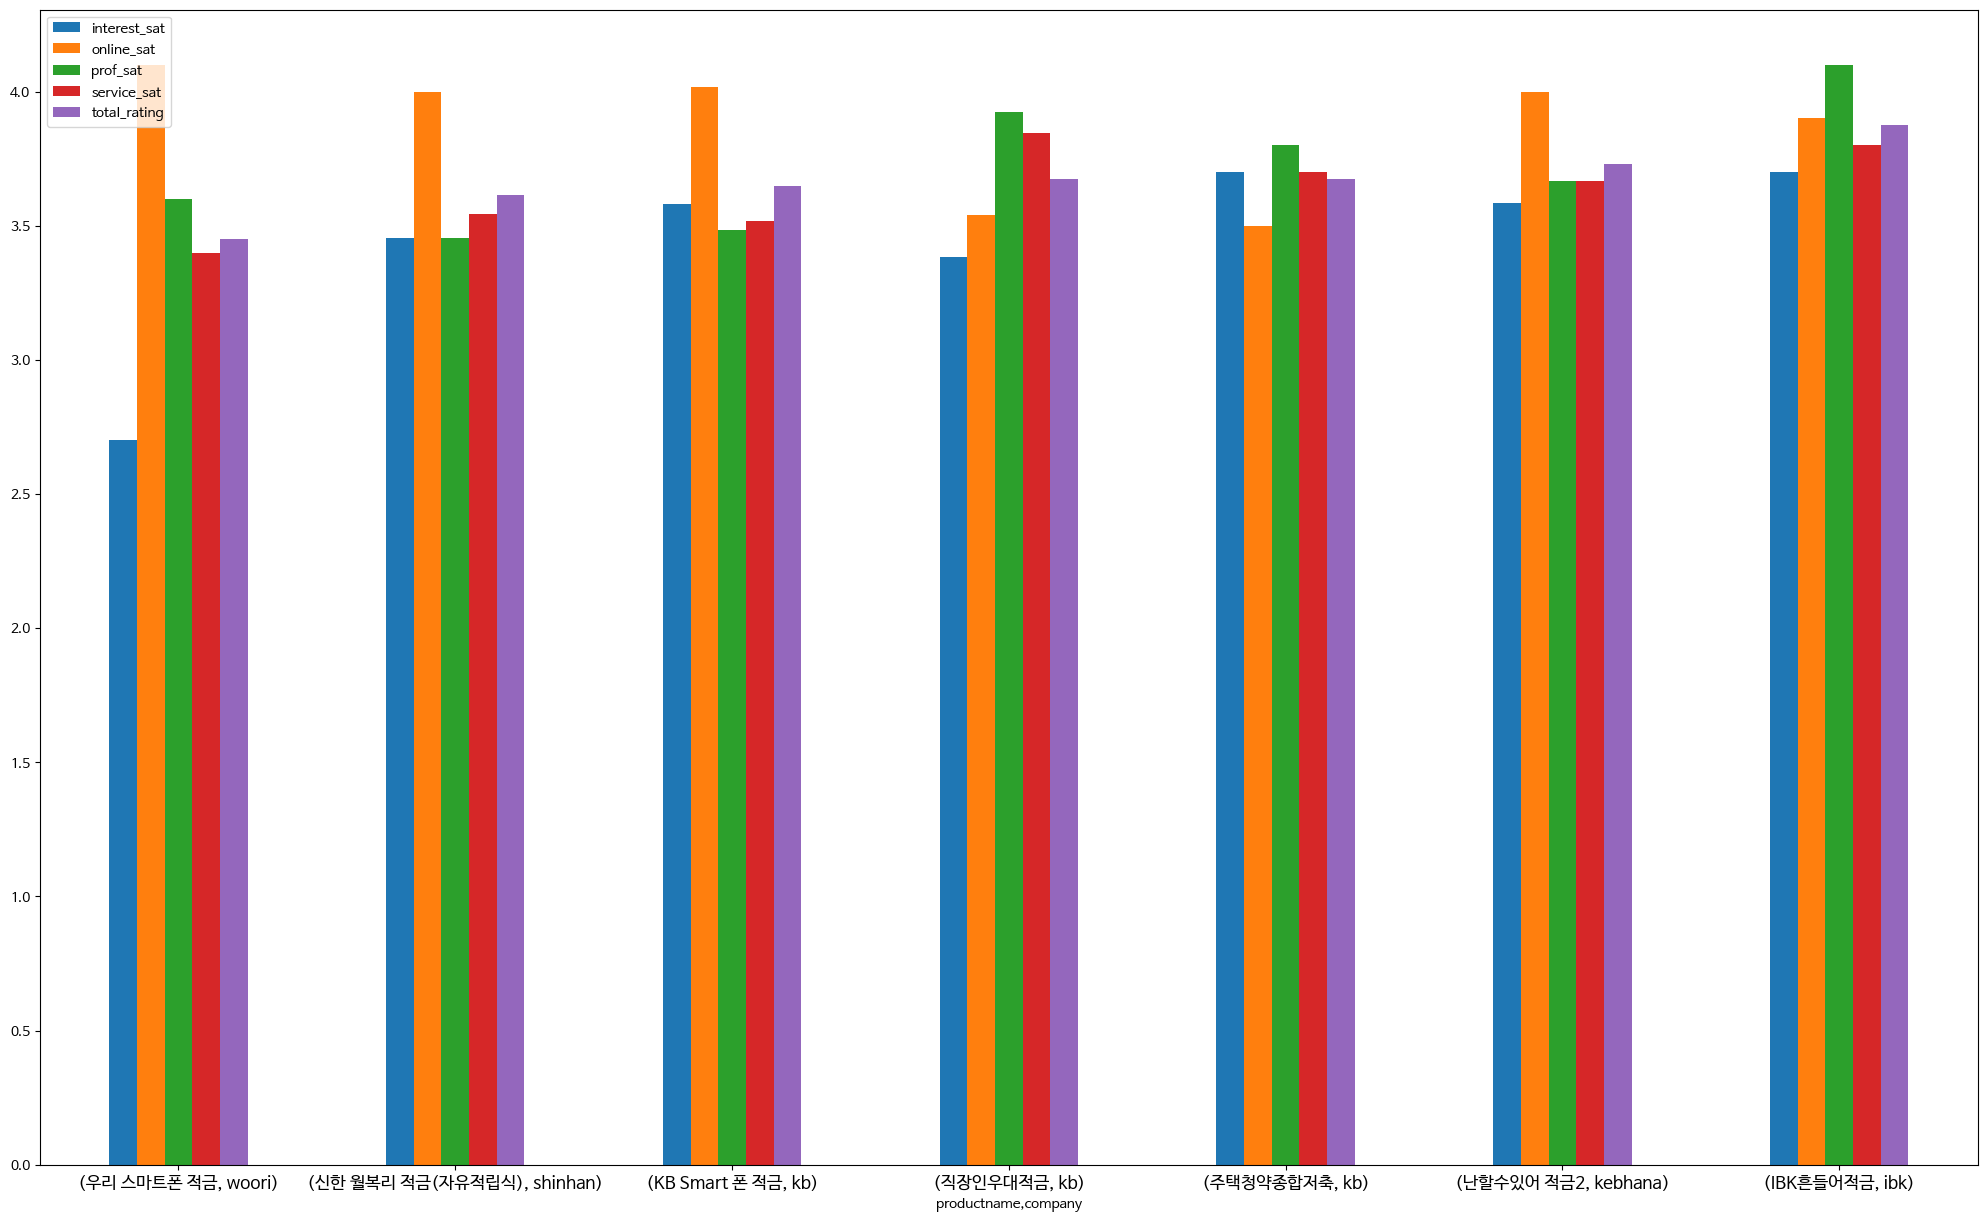

In [ ]:
# from matplotlib import font_manager, rc

# # Use a common font name without specifying the full path
# font_name = "AppleGothic"

# # Set the font for matplotlib
# rc('font', family=font_name)

dp_reviews[dp_reviews['review_counts'] >= 10].groupby(['productname','company']).mean().sort_values('total_rating')[['interest_sat','online_sat','prof_sat','service_sat','total_rating']].plot(kind = 'bar',figsize = (25,15),style = True)
plt.xticks(fontsize = 12.5,rotation = 0)
plt.legend(loc = 2)

* 각각의 상품들에 대한 키워드 뽑아내기
    * 리뷰가 10개 이상 기록된 상품들의 댓글을 분석하여 상품에 대한 키워드를 뽑아보자

In [ ]:
from konlpy.tag import Kkma
# 1. 상품별 전체 리뷰 합치기
ibkshakeit = ' '.join(dp_reviews[(dp_reviews['company'] == 'ibk') & (dp_reviews['productname'] == 'IBK흔들어적금')]['review'])
#IBK 흔들어적금의 전체 리뷰
kebyoucando  = ' '.join(dp_reviews[(dp_reviews['company'] == 'kebhana') & (dp_reviews['productname'] == '난할수있어 적금2')]['review'])
kbhouse = ' '.join(dp_reviews[(dp_reviews['company'] == 'kb') & (dp_reviews['productname'] == '주택청약종합저축')]['review'])
kbemp = ' '.join(dp_reviews[(dp_reviews['company'] == 'kb') & (dp_reviews['productname'] == '직장인우대적금')]['review'])
kbphone = ' '.join(dp_reviews[(dp_reviews['company'] == 'kb') & (dp_reviews['productname'] == 'KB Smart 폰 적금')]['review'])
shinhanmonthly = ' '.join(dp_reviews[dp_reviews['productname'] == '신한 월복리 적금(자유적립식)']['review'])
wooriphone = ' '.join(dp_reviews[dp_reviews['productname'] == '우리 스마트폰 적금']['review'])


# 2. konlpy의 형태소 분석기로 문장을 분석
ibkshakeit = ' '.join(Kkma().morphs(ibkshakeit))
kebyoucando = ' '.join(Kkma().morphs(kebyoucando))
kbhouse = ' '.join(Kkma().morphs(kbhouse))
kbemp = ' '.join(Kkma().morphs(kbemp))
kbphone = ' '.join(Kkma().morphs(kbphone))
shinhanmonthly = ' '.join(Kkma().morphs(shinhanmonthly))
wooriphone = ' '.join(Kkma().morphs(wooriphone))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF VECTORIZER를 이용해서 리뷰에 쓰인 각각의 단어들의 키워드 구분 점수 부여 (회사명같은 단어는 제외)
tfidf = TfidfVectorizer(max_df=0.6, analyzer='word', stop_words=['신한', '흔들어', '주택', '청약', '네요', '하나', '습니다'])
wordsdata = [ibkshakeit, kebyoucando, kbhouse, kbemp, kbphone, shinhanmonthly, wooriphone]
tfidf_matrix = tfidf.fit_transform(wordsdata)

feature_names = tfidf.get_feature_names_out()  # tf-idf를 산출하는데 사용된 모든 단어
dense = tfidf_matrix.todense()  # 각각의 상품에 대한 리뷰들의 단어별 tf-idf score를 산출한 값

ibkshakeitlst = dense[0].tolist()[0] # ibk흔들어 상품에 대한 리뷰들의 단어별 tf-idf score가 저장된 값
phrase_scores = [pair for pair in zip(range(0, len(ibkshakeitlst)), ibkshakeitlst) if pair[1] > 0] # (단어가 위치한 index, IBK흔들어 상품 기준 tf-idf score)의 tuple로 구성된 list
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1) # phrase_socres를   IBK 흔들어 상품의 tf-idf score를 기준으로 정렬
ibkshakeittop10 = [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:10] # tf-idf score가 가장높은10개의 (단어,tf-idf score) tuple로 구성된 list

phrase_scores = [pair for pair in zip(range(0, len(dense[1].tolist()[0])), dense[1].tolist()[0]) if pair[1] > 0] #keb나는 할수 있어
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
kebyoucandotop10 = [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:10]

phrase_scores = [pair for pair in zip(range(0, len(dense[2].tolist()[0])), dense[2].tolist()[0]) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
kbhousetop10 = [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:10]

phrase_scores = [pair for pair in zip(range(0, len(dense[3].tolist()[0])), dense[3].tolist()[0]) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
kbemptop10 = [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:10]

phrase_scores = [pair for pair in zip(range(0, len(dense[4].tolist()[0])), dense[4].tolist()[0]) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
kbphonetop10 = [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:10]

phrase_scores = [pair for pair in zip(range(0, len(dense[5].tolist()[0])), dense[5].tolist()[0]) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
shinhanmonthlytop10 = [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:10]

phrase_scores = [pair for pair in zip(range(0, len(dense[6].tolist()[0])), dense[6].tolist()[0]) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
wooriphonetop10 = [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:10]


* 각각의 상품에 대한 리뷰 중 keywords중 top 10 키워드
    * ibk흔들어 저축의 경우 그룹, 접근, 느낌 재미있는 등이 핵심 키워드로 선택되었다.

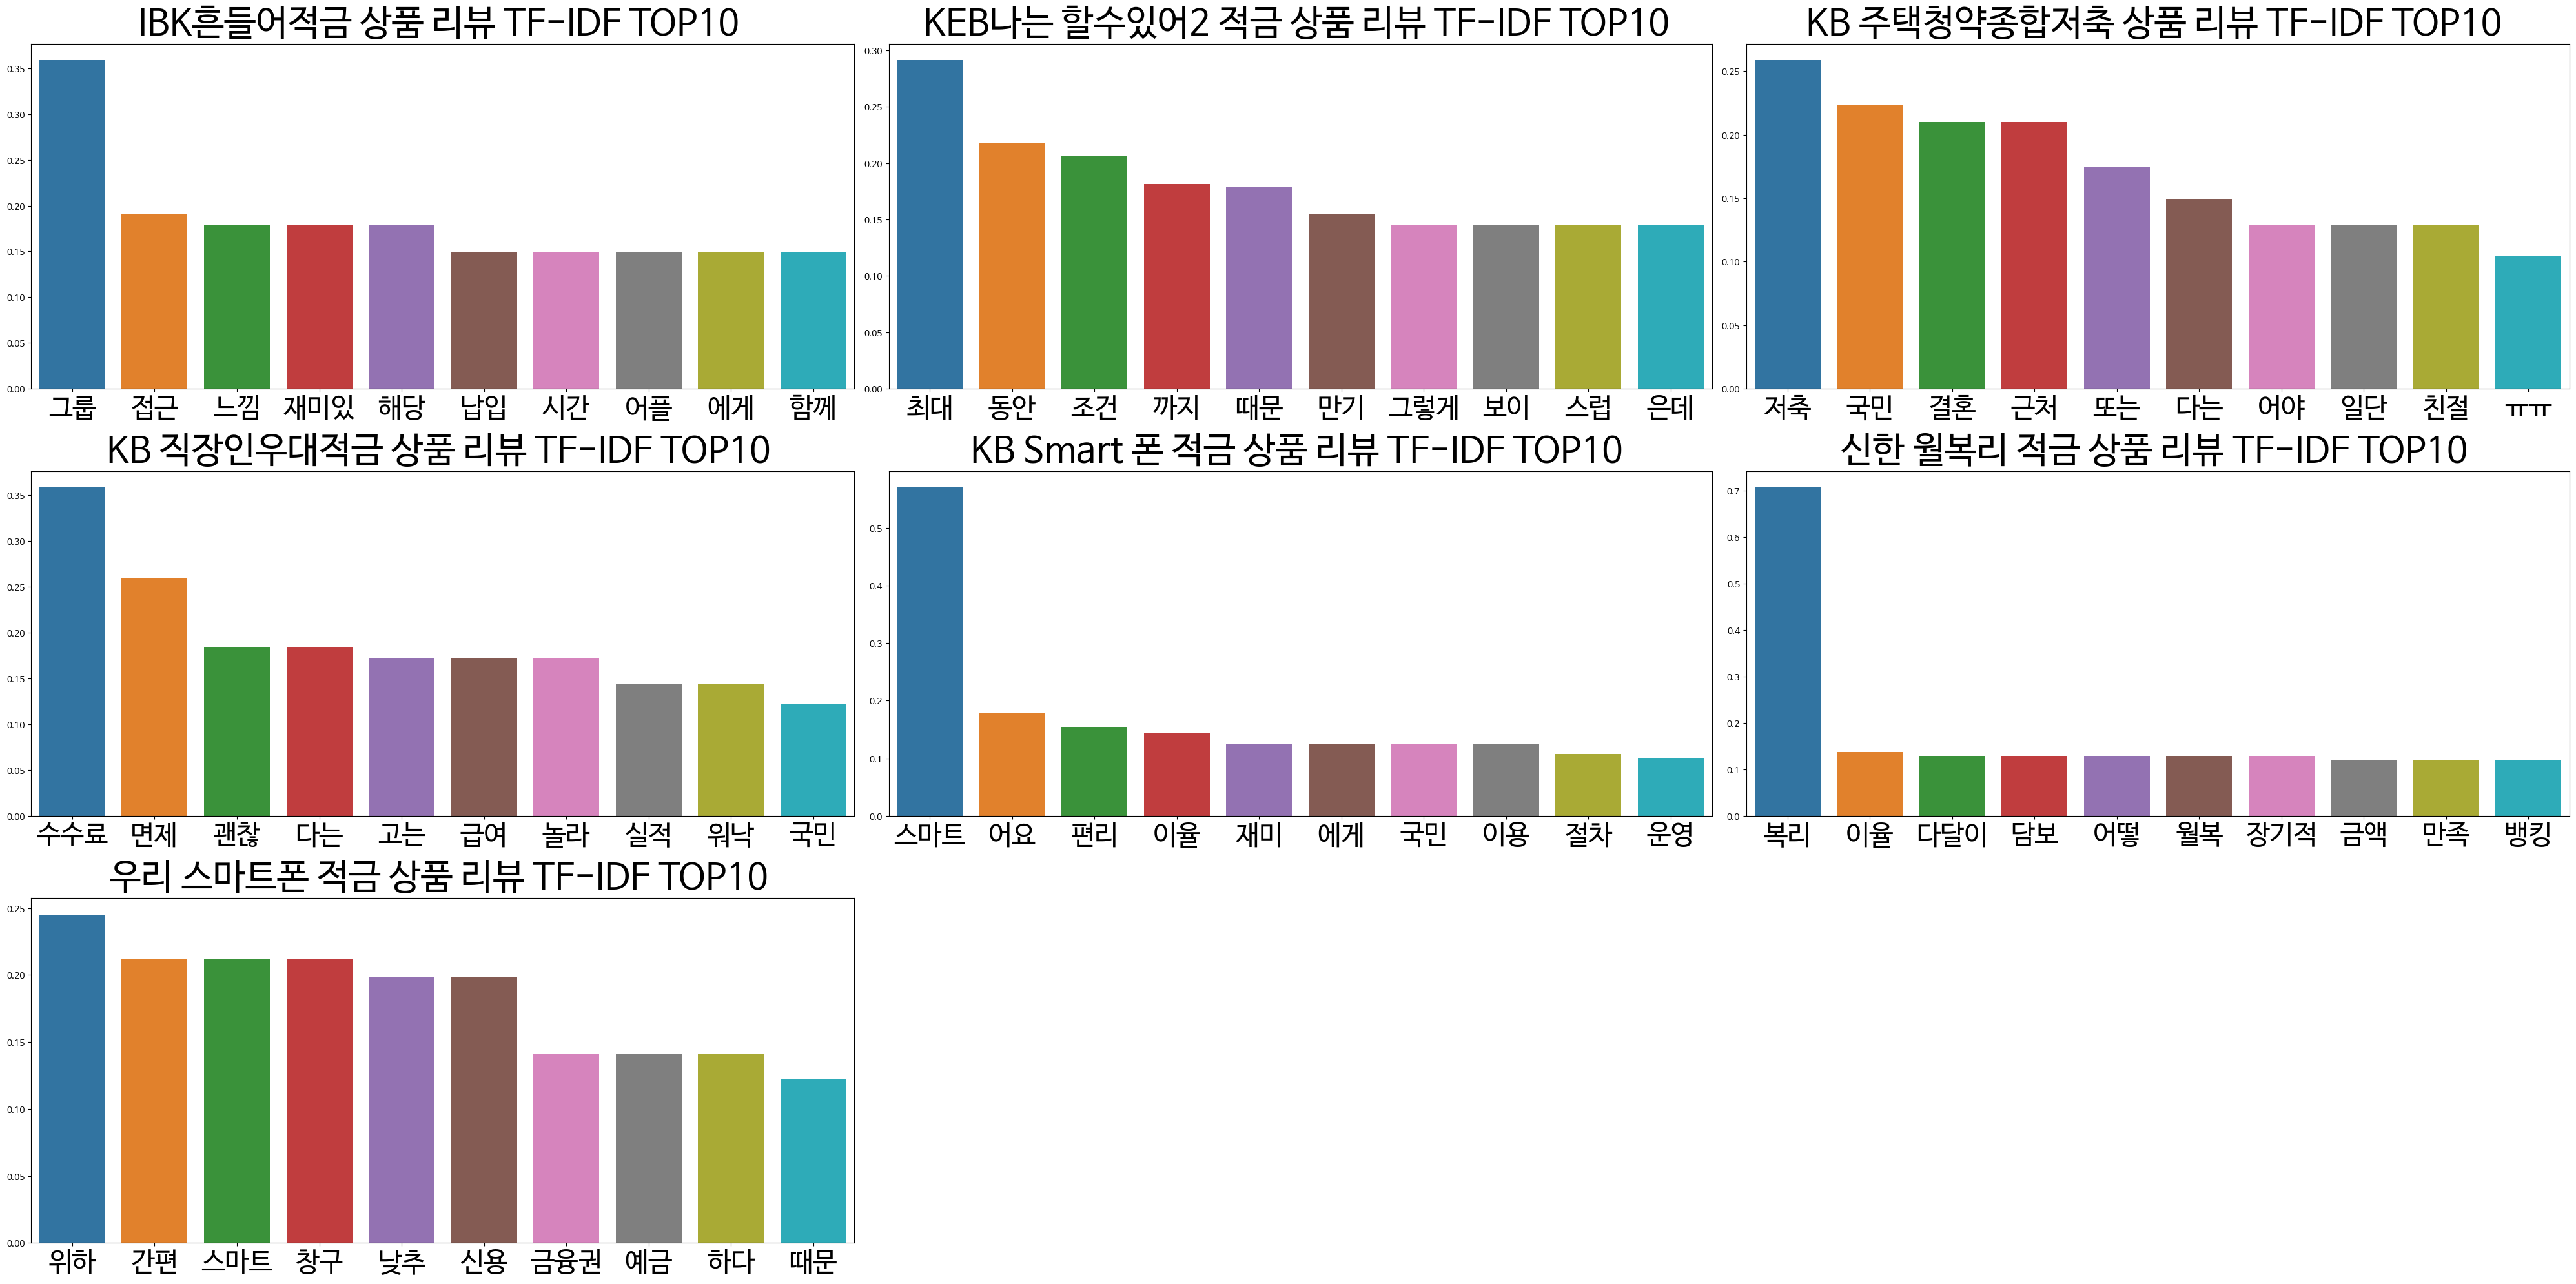

In [ ]:
#from matplotlib import font_manager, rc
#font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#rc('font', family=font_name)
productname = ['IBK흔들어적금','KEB나는 할수있어2 적금','KB 주택청약종합저축','KB 직장인우대적금',
               'KB Smart 폰 적금','신한 월복리 적금','우리 스마트폰 적금']

top10lsts = [ibkshakeittop10, kebyoucandotop10, kbhousetop10, kbemptop10, kbphonetop10, shinhanmonthlytop10, wooriphonetop10 ]
plt.figure(figsize=(40, 20))
mpl.rcParams['xtick.labelsize'] = 30

for num, (top10, name) in enumerate(zip(top10lsts, productname)):
    plt.subplot(3, 3, num + 1)
    sns.barplot(x=list(map(lambda x: x[0], top10)), y=list(map(lambda x: x[1], top10)))
    plt.tight_layout()
    plt.title(u'{} 상품 리뷰 TF-IDF TOP10 '.format(name), {'fontsize': 40})

* 실제로 ibk흔들어적금에 대한 리뷰에서는 여러명이 그룹일 지어 특정 적금에 가입하면 추가 이자를 더해주는 혜택을 부여한것에 대해 다양한 반응이 나타나고 있는것을 확인할 수 있었다.


In [ ]:
for i in dp_reviews[(dp_reviews['productname'] == 'IBK흔들어적금')]['review']:
    print(i,'\n','==================================================')

온라인으로 가입이 가능하기에 직장인으로서 접근성면에서 만족하였다.
하지만 초반에 흔들어라는 그룹에 들어라기 위해 다른 어플을 하나 더 깔아야 하는 점이 불편한 느낌을 주었다. 들어가서는 하나의 미션으로 모인 많은 사람들과 함께 돈을 모아간다는 느낌에 동기부여도 되고 돈을 모으는 것이 하나의 재미있는 이슈가 되었다. 딱딱한 금융상품을 재미있게 잘 풀어낸 상품같다고 생각합니다. 대체적으로 1금융권이 가진 태생적 저금리는 어쩔 수 없지만 접근성과 흥미유발 측면에서 만족 
흔들어적금이란 걸 들었는데 금리우대가 크고 환전 수수료가 좋아요 그러나 상품들이 단조로워요 
어플에서 납입일과 금액설정을 하여 그룹을 만들거나 원하는 그룹에 참여하면 인원수에 따라서 추가이자를 제공하고 부가적으로 게임을 통해 자유롭게 적금이 가능하여 젊은층에게 접근성이 용이하다 하지만, 큰 단점은 없지만 이자가 좀 낮은 감이 없지 않아 있다 
해당 상품이 인터넷 전용 상품이라 신규가입및 해지가 편하고 장기고객에게 주기적으로 선물도 주고 좋습니다^^ 하지만, 큰 단점은 아니지만, 콜센터에 전화를 하면 대기시간이 조금 있는 편이다 
가입했던 흔들어적금은 모바일 전용상품이라 가입도 쉽고, 금리가 조금 낮아지긴 했지만 다른곳에 비해 평균 금리는 높은 편에 속하는 듯 하지만, 납입한도가 너무 낮게 정해져있고 1-2년단위로 계속해서 금리가 너무 낮아져서 아쉬움 
여러명이 그룹을 지어 금리를 올려가는 적금으로 가입하였습니다.



가입은 매우쉬웠고 나 하나가 아닌 타인과 함께한다 생각하니 적금의 필요성에 대해 더 느끼게되고 자극이되는 좋은 상품이었습니다 
간편하게 가입할 수 있어서 좋음 인터넷을 사용해서 시간도 절약할 수 있다 
모바일로 간편하게 할수 있고

다른것보다 금리 우대 되요

 
소액으로 여행경비를 마련하기 위해서 적금상품을 찾았는데, 모바일로 가입이 가능하고 창구에서 가입하는 것 보다 0.01%정도 더 주는 것도 좋았습니다.

창구에 직접 가지 않아도 되고, 만기후에 입출금 자유통장으로 이체되어 편

# 정기예금 상품 분석

In [ ]:
# df_df = pd.read_sql('select * from deposit_fixed ',engine)
# df_df = df_df.drop_duplicates(['productname','company'])
# df_df = df_df.reset_index()

In [ ]:
df_df = pd.read_csv('/content/drive/MyDrive/ASAC_최종프로젝트/data/dp/df_df.csv', encoding = 'utf-8', index_col='Unnamed: 0')

In [ ]:
df_df

,index,idandtype,productname,company,interest_type,highest_rate,deposit_limit,period,redemption_interest,monthly_interest,review_counts,average_rate
0,0,2359DEPOSITFSS,iTouch\r\n우리예금,woori,단리,1.45,제한없음,12개월 ~ 36개월,입금일 당시 고시한 일반정기예금의 중도해지이율 적용,\r\n개월별 기본금리\r\n6개월기본 1.2%우대 시 1.4%12개월기본 1.25...,0,NaN
1,2,2361DEPOSITFSS,위비톡예금,woori,단리,7.00,제한없음,3개월 ~ 12개월,입금일 당시 고시한 일반정기예금의 중도해지이율 적용,\r\n개월별 기본금리\r\n6개월기본 1.4%우대 시 1.7%12개월기본 1.7%...,0,NaN
2,5,2364DEPOSITFSS,Red Monkey\r\n스마트 정기예금,woori,단리,1.40,300만원 ~ 제한없음,12개월,입금일 당시 고시한 일반정기예금의 중도해지이율 적용,\r\n개월별 기본금리\r\n6개월기본 1%우대 시 1.2%12개월기본 1.2%우대...,0,NaN
3,6,2365DEPOSITFSS,우리웰리치 주거래예금,woori,단리,1.50,100만원 ~ 제한없음,6개월 ~ 12개월,입금일 당시 고시한 일반정기예금의 중도해지이율 적용,\r\n개월별 기본금리\r\n6개월기본 1.15%우대 시 1.35%12개월기본 1....,0,NaN
4,8,2367DEPOSITFSS,우리웰리치100예금(회전형),woori,단리,1.45,300만원 ~ 제한없음,12개월 ~ 60개월,입금일 당시 고시한 일반정기예금의 중도해지이율 적용,\r\n개월별 기본금리\r\n12개월기본 1.25%우대 시 1.45%\r\n,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
194,1002,3383DEPOSITFSS,쏠쏠한마이쿨예금,gwangju,단리,1.75,제한없음,제한없음,NaN,\r\n개월별 기본금리\r\n12개월기본 1.75%우대 시 1.75%\r\n,0,NaN
195,1003,3384DEPOSITFSS,신한 두근두근 커플 정기예금\r\n(스마트폰 전용),shinhan,단리,1.68,제한없음,제한없음,NaN,\r\n개월별 기본금리\r\n12개월기본 1.68%우대 시 1.68%\r\n,0,NaN
196,1004,3385DEPOSITFSS,(e)-정기예금,kuemhwa_sb,단리,2.40,제한없음,제한없음,NaN,\r\n개월별 기본금리\r\n6개월기본 1.9%우대 시 1.9%12개월기본 2.2%...,0,NaN
197,1012,3393DEPOSITFSS,i-ONE놀이터예금,ibk,단리,1.30,제한없음,제한없음,NaN,\r\n개월별 기본금리\r\n6개월기본 1.25%우대 시 1.25%12개월기본 1....,0,NaN


* 정기 적금 상품의 이자율을 구할때와 동일하게 기본 이자율과 실질 이자율을 적용시킨다.

In [ ]:
df_df['month_6'] = df_df.monthly_interest.apply(find_6)#monthly_interest(개월별 금리) 부분에서 6개월 금리만 따로 때어냄
df_df['month_12'] = df_df.monthly_interest.apply(find_12)
df_df['month_24'] = df_df.monthly_interest.apply(find_24)
df_df['month_36'] = df_df.monthly_interest.apply(find_36)

In [ ]:
# 단리 계산식
def month_df_real(interest,month):
    if not np.isnan(interest):
        a = 100 #지급한 금액의 가치
        b = interest * (month/12.0) + 100  # 수익의 미래가치
        b = b / (1.0125)**(month/12.0) # 만기후 수령액의 현재가치
        return ((b/a)**(12.0/month) - 1) * 100 # 1년 평균 이자율
    else:
        return 0

# 복리 계산식
def month_df_complex_real(interest,month):
    if interest != np.nan:
        a =  100
        b =  100 * (1 + (interest * 0.01))** (month / 12.0)
        b = b / (1.0125)**(month/12.0) # 만기후 수령액의 현재가치
        return ((b/a)**(12.0/month) - 1) * 100

    else:
        return 0

real_interest = []
interest_period = []

for i in range(len(df_df)):
    if df_df.loc[i, 'interest_type'] == '단리':  # 상품의 금리방식이 단리인 경우
        real_interest.append(max(month_df_real(df_df.loc[i, 'month_6'], 6), month_df_real(df_df.loc[i, 'month_12'], 12),
                                 month_df_real(df_df.loc[i, 'month_24'], 24), month_df_real(df_df.loc[i, 'month_36'], 36)))
        interest_period.append(np.argmax(
            [month_df_real(df_df.loc[i, 'month_6'], 6), month_df_real(df_df.loc[i, 'month_12'], 12), 0,
             month_df_real(df_df.loc[i, 'month_24'], 24), 0, month_df_real(df_df.loc[i, 'month_36'], 36)]))

    elif df_df.loc[i, 'interest_type'] == '복리':  # 상품의 금리방식이 복리인 경우
        real_interest.append(max(month_df_complex_real(df_df.loc[i, 'month_6'], 6),
                                 month_df_complex_real(df_df.loc[i, 'month_12'], 12),
                                 month_df_complex_real(df_df.loc[i, 'month_24'], 24),
                                 month_df_complex_real(df_df.loc[i, 'month_36'], 36)))
        interest_period.append(np.argmax(
            [month_df_complex_real(df_df.loc[i, 'month_6'], 6), month_df_complex_real(df_df.loc[i, 'month_12'], 12),
             0, month_df_complex_real(df_df.loc[i, 'month_24'], 24), 0,
             month_df_complex_real(df_df.loc[i, 'month_36'], 36)]))

df_df['real_interest'] = np.asarray(real_interest)
df_df['maximum_period'] = (np.asarray(interest_period) + 1) * 6

In [ ]:
sum(df_df['real_interest'] < 0)

8

* 실질금리 top10 정기예금
    * 고려저축은행의 정기예금 상품이 가장 높은 실질 금리를 가지는 상품으로 나타남

In [ ]:
df_df.sort_values('real_interest',ascending = False)[:10][['productname', 'company','interest_type','month_12' ,'real_interest','maximum_period']]

,productname,company,interest_type,month_12,real_interest,maximum_period
64,정기예금,goryo_sb,단리,2.40,1.363174,36
112,정기예금,charm_sb,단리,2.40,1.300791,24
165,e-정기예금,choeun_sb,단리,2.20,1.269319,36
58,정기예금,choeun_sb,단리,2.10,1.175290,36
106,e-정기예금,smart_sb,단리,2.30,1.128209,36
103,정기예금,double_sb,단리,2.38,1.116049,12
196,(e)-정기예금,kuemhwa_sb,단리,2.20,1.108021,24
57,정기예금,thek_sb,복리,2.12,1.106173,36
159,회전정기예금,pepper_sb,단리,2.35,1.086420,12
148,정기예금,jtchinae_sb,단리,2.20,1.081085,36


* 제 1금융권 상품중에서 가장 높은 실질 금리를 제공하는 상품을 검색한 결과 신한은행의 온라인 전용 정기예금 상품이 검색됨

In [ ]:
banking_sectors = ['bnkgn','citi','dgb','gwangju','ibk','jbb','jeju', 'kb', 'kdb', 'kebhana', 'nh', 'sc', 'shinhan', 'suhyup','woori']
df_df[[company in banking_sectors for company in df_df['company']]].sort_values('real_interest',ascending = False)[:10][['productname',
                                                                    'company','interest_type','month_12' ,'real_interest','maximum_period']]

,productname,company,interest_type,month_12,real_interest,maximum_period
193,신한 S드림 정기예금(온라인전용),shinhan,단리,1.73,0.645467,36
130,신한 스마트 정기예금\r\n(스마트폰 전용),shinhan,단리,1.83,0.572840,12
36,JB 다이렉트예금통장\r\n(만기일시지급식),jbb,단리,1.80,0.543210,12
27,사이버우대정기예금(만기지급식),jeju,단리,1.75,0.527492,24
141,e-금리우대 예금,nh,단리,1.71,0.512137,36
129,U드림 정기예금(온라인전용),shinhan,단리,1.58,0.502599,36
194,쏠쏠한마이쿨예금,gwangju,단리,1.75,0.493827,12
143,법사랑플러스(채움정기예금),nh,단리,1.66,0.464433,36
157,e-파트너정기예금(구 외환은행),kebhana,단리,1.55,0.464433,36
47,KDB Hi 정기예금,kdb,단리,1.70,0.444444,12


* 정기예금 상품의 경우 가장 많은 리뷰수를 기록한 제품이 3개의 리뷰만 나타나는등 전반적으로 상품에 대한 리뷰가 활발하게 진행되지 않고 있음
    * 정기예금 상품의 리뷰 분석은 큰 효과가 없을 것으로 나타남

In [ ]:
df_df[df_df['review_counts'] > 1][['productname','company','interest_type','highest_rate','period',
                                   'deposit_limit','review_counts']].sort_values('review_counts',ascending = False)

,productname,company,interest_type,highest_rate,period,deposit_limit,review_counts
130,신한 스마트 정기예금\r\n(스마트폰 전용),shinhan,단리,1.83,3개월 ~ 12개월,"50만원 ~ 3,000만원",3
71,정기예금,incheon_sb,단리,2.40,1개월 ~ 36개월,제한없음,2
75,정기예금 단리식,ms_sb,단리,2.20,제한없음,제한없음,2
122,e-파워정기예금,kb,단리,1.50,1개월 ~ 12개월,100만원 ~ 제한없음,2
154,정기예금,ok_sb,단리,2.40,1개월 ~ 36개월,10만원 ~ 제한없음,2
155,행복Together정기예금,kebhana,단리,1.40,12개월,"100만원 ~ 5,000만원",2
